In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import GA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error as MSE

In [2]:
def spectra_from_conc(action, RED, GREEN, BLUE):
    """Transforms actions and input into output."""
    fract = normalize_to_fraction(action)
    return RED*fract[0] + GREEN*fract[1] + BLUE*fract[2]

def normalize_to_fraction(action):
    """Returns the fraction of total volume given the concentrations (action)."""
    total = np.sum(action)
    return action / total

class Environment(object):
    def __init__(self, target, RED, GREEN, BLUE):
        # in future this will be basis spectra
        self.target = target
        self.RED = RED
        self.GREEN = GREEN
        self.BLUE = BLUE
        self.metric = []
   
    def get_cos_sim(self, target, y):
        return np.average(cosine_similarity(target.reshape(1, -1), Y=y.reshape(1, -1)).squeeze())    
    
    def sample(self, action):
        # put functins in utils python file
        result = spectra_from_conc(action, self.RED, self.GREEN, self.BLUE)
        sim = self.get_cos_sim(self.target, result)
        mse = MSE(self.target, result)
        self.metric.append(sim)
        return sim

In [3]:
sample_spectra = pd.read_excel('../../../data/Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
# spectra of base dyes
RED = sample_spectra[:,1]
GREEN = sample_spectra[:,2]
BLUE = sample_spectra[:,3]

target_conc = np.random.dirichlet((1, 1, 1), 1)[0]
target_spectra = spectra_from_conc(target_conc, RED, GREEN, BLUE)
env = Environment(target_spectra, RED, GREEN, BLUE)

batch_size = 20
generation_zero = np.random.dirichlet((1, 1, 1), batch_size)
print(generation_zero)
epochs = 20
mutation_rate = 0.05
num_parents = batch_size//5

[[4.54367787e-02 6.93236102e-01 2.61327119e-01]
 [4.50601523e-02 5.68000644e-01 3.86939203e-01]
 [2.32438792e-01 3.13353506e-01 4.54207702e-01]
 [4.72820464e-01 4.87695055e-01 3.94844805e-02]
 [2.21066073e-01 5.10896085e-02 7.27844319e-01]
 [6.61916881e-04 4.62382843e-01 5.36955241e-01]
 [4.77078697e-02 5.52311689e-01 3.99980442e-01]
 [7.37462098e-01 2.02619958e-01 5.99179440e-02]
 [6.80536369e-01 2.00644824e-01 1.18818807e-01]
 [2.69635163e-01 2.65319009e-01 4.65045828e-01]
 [5.35299426e-01 4.41761637e-01 2.29389368e-02]
 [6.51610964e-01 1.77912686e-01 1.70476350e-01]
 [1.33339126e-02 8.75343941e-01 1.11322146e-01]
 [3.00742367e-01 4.35033279e-01 2.64224354e-01]
 [1.20698364e-01 7.20730970e-01 1.58570666e-01]
 [8.48749007e-03 3.34485956e-01 6.57026553e-01]
 [2.65172046e-01 3.43717419e-01 3.91110534e-01]
 [6.59494036e-01 7.77733104e-02 2.62732654e-01]
 [2.64579515e-01 6.85597652e-01 4.98228328e-02]
 [6.63751179e-01 2.97710218e-01 3.85386031e-02]]


In [4]:
GA = GA.GA(env, batch_size, generation_zero, num_parents)
print(target_conc)

[0.72651999 0.03933792 0.2341421 ]


In [5]:
data = [generation_zero]
for i in range(epochs):
    data.append(GA.learn())

<ipython-input-6-dc74ae0addea>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


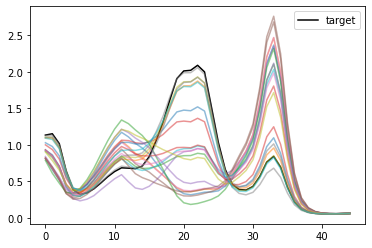

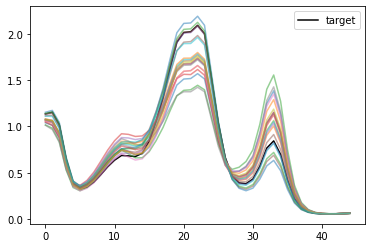

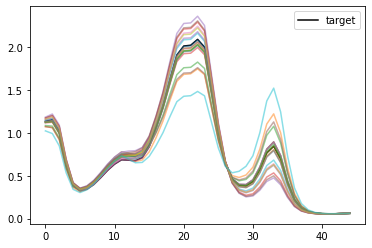

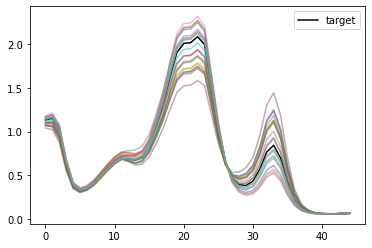

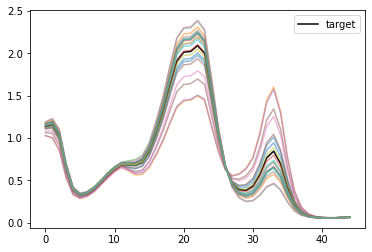

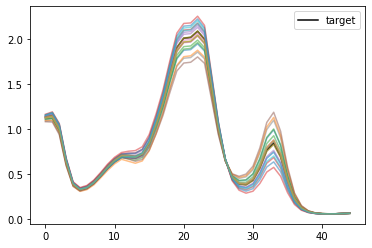

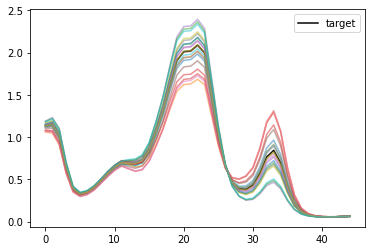

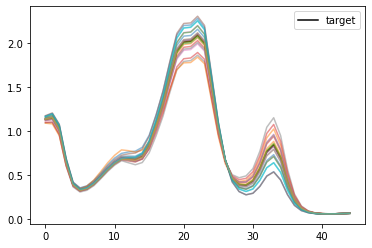

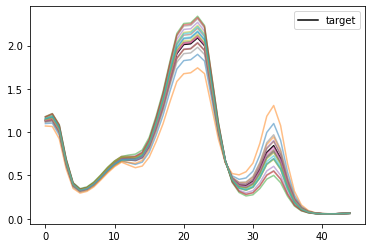

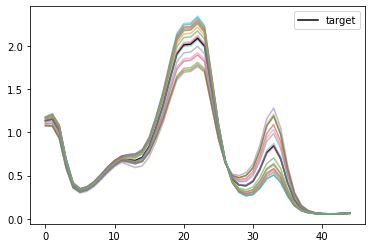

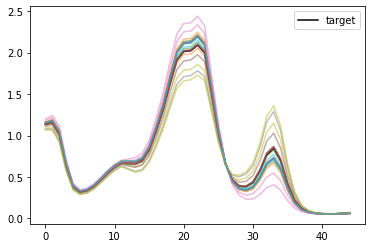

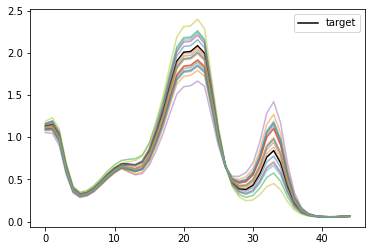

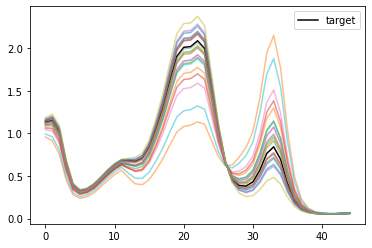

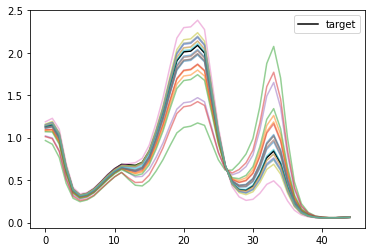

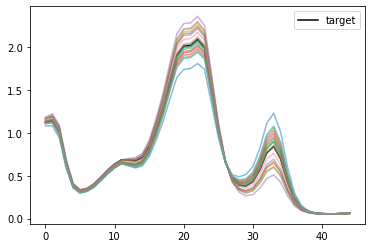

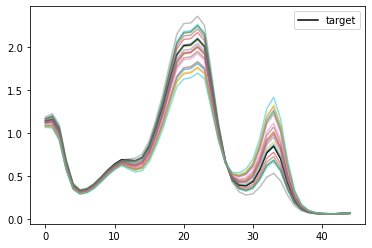

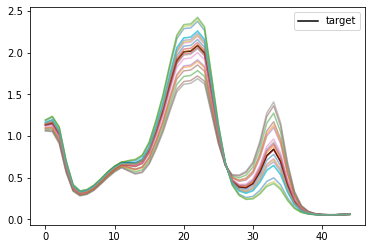

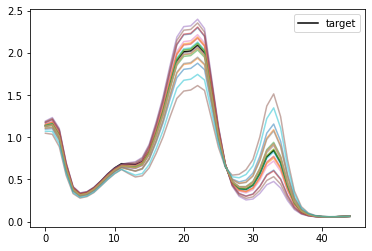

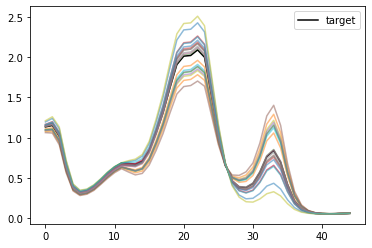

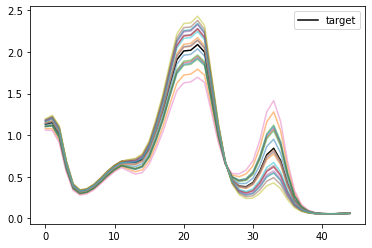

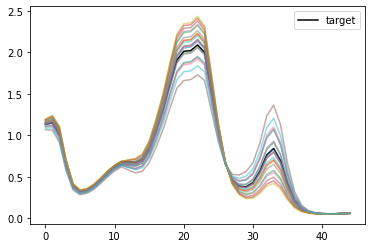

In [6]:
for epoch in data:
    plt.figure()
    plt.plot(target_spectra, color='black', label='target')
    for sol in epoch:
        spec = spectra_from_conc(sol, RED, GREEN, BLUE)
        plt.plot(spec, alpha=.5)
    plt.legend()

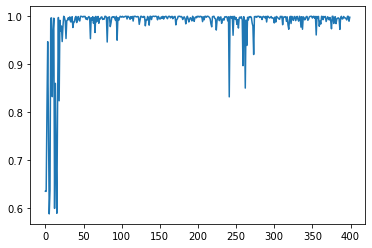

In [7]:
plt.plot(env.metric)

In [8]:
x = np.array(env.metric)

In [9]:
y = np.array_split(x, batch_size)
means = []
for batch in y:
    means.append(np.mean(batch))

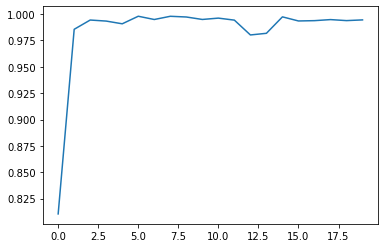

In [10]:
plt.plot(means)
